In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Duration of the signal (seconds)
N = int(fs * T)  # Number of samples (fs * T)

# Generate a random signal (time-domain)
time = np.linspace(0, T, N, endpoint=False)  # Time vector
random_signal = np.random.rand(N) - 0.5  # Random signal (centered around 0)
# Add a random sinusoidal component
freq_sin = 50  # Frequency of the sinusoidal component (Hz)
amplitude_sin = 0.5  # Amplitude of the sinusoidal component
sinusoidal_component = amplitude_sin * np.sin(2 * np.pi * freq_sin * time)

# Combine random signal and sinusoidal component
signal = random_signal + sinusoidal_component

# Perform FFT
fft_result = np.fft.fft(signal)  # Compute FFT
frequencies = np.fft.fftfreq(N, d=1/fs)  # Frequency bins

# Take the magnitude of the FFT result (only real part matters for amplitude)
magnitude = np.abs(fft_result) / N  # Normalize magnitude

# Only consider the positive frequencies (symmetric result for real signals)
positive_frequencies = frequencies[:N//2]
positive_magnitude = magnitude[:N//2]

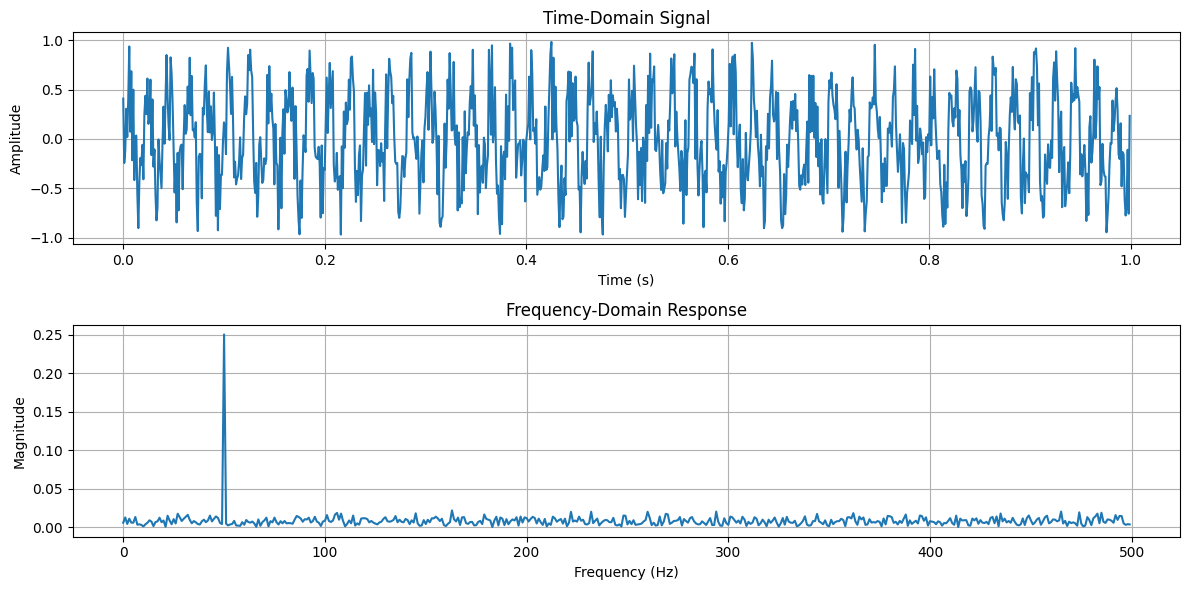

In [5]:
# Plot the time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Plot the frequency-domain response
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, positive_magnitude)
plt.title("Frequency-Domain Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()